# Audio Classification New

### Drive Mount and Importing the Libtraries


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [23]:
# Pkgs loading
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline

### Dataset and Metadata

In [24]:
audio_dataset_path='/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio'
metadata=pd.read_csv('/content/drive/MyDrive/Capstone/GTZAN_Dataset/features.csv')
metadata.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,fold,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.0645,2002.449060,85882.76132,...,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,1,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.0736,2039.036516,213843.75550,...,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,1,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.6434,1747.702312,76254.19226,...,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,1,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.9424,1596.412872,166441.49480,...,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,1,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.9393,1748.172116,88445.20904,...,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,1,blues


In [25]:
# Dataset Balancing/Imbalancing Check
metadata['label'].value_counts()

blues        100
classical    100
country      100
disco        100
hiphop       100
jazz         100
metal        100
pop          100
reggae       100
rock         100
Name: label, dtype: int64

### EDA

In [26]:
dat1, sampling_rate1 = librosa.load('/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold2/classical.00000.wav')

Text(0.5, 1.0, 'Linear-frequency power spectrogram')

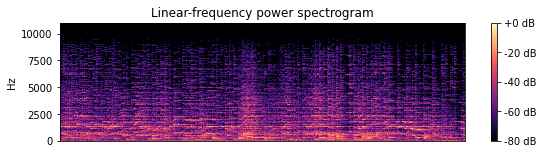

In [27]:
plt.figure(figsize=(20, 10))
D = librosa.amplitude_to_db(np.abs(librosa.stft(dat1)), ref=np.max)
plt.subplot(4, 2, 1)
librosa.display.specshow(D, y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Linear-frequency power spectrogram')

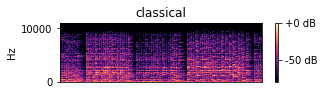

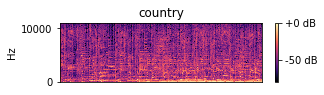

In [28]:
'''Using random samples to observe difference in waveforms.'''

arr = np.array(metadata["filename"])
fold = np.array(metadata["fold"])
cla = np.array(metadata["label"])

for i in range(198, 202, 2):
    path = '/content/drive/MyDrive/Capstone/GTZAN_Dataset/audio/fold' + str(fold[i]) + '/' + arr[i]
    data, sampling_rate = librosa.load(path)
    plt.figure(figsize=(10, 5))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(data)), ref=np.max)
    plt.subplot(4, 2, 1)
    librosa.display.specshow(D, y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(cla[i])

### Features Extraction

In [29]:
# Extracting MFCC's For every audio file
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, sr=None, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [31]:
# Features extraction from all audio files (MFCC)
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["filename"]))
    final_class_labels=row["label"]
    data=features_extractor(file_name)
    extracted_features.append([data,final_class_labels])

1000it [03:57,  4.21it/s]


In [33]:
# Converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','label'])
extracted_features_df.head()

,feature,label
0,"[-113.59882, 121.57067, -19.162262, 42.36394, ...",blues
1,"[-207.52383, 123.98514, 8.94702, 35.86715, 2.9...",blues
2,"[-90.757164, 140.44087, -29.084547, 31.686693,...",blues
3,"[-199.57513, 150.0861, 5.663404, 26.855282, 1....",blues
4,"[-160.35417, 126.20948, -35.581394, 22.139256,...",blues


In [35]:
# Data Frame Saving
extracted_features_df.to_csv("Music_Genre_DF.csv")

### Data Splitting and Encoding

In [36]:
# Data Splitting
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['label'].tolist())

In [92]:
X

array([[-1.13598824e+02,  1.21570671e+02, -1.91622620e+01, ...,
        -5.96904308e-02, -3.45858479e+00, -1.84183216e+00],
       [-2.07523834e+02,  1.23985138e+02,  8.94701958e+00, ...,
        -4.15596932e-01, -1.99541461e+00, -4.65217888e-01],
       [-9.07571640e+01,  1.40440872e+02, -2.90845470e+01, ...,
        -6.70323372e+00, -4.42533350e+00, -9.81519222e-01],
       ...,
       [-1.24989655e+02,  1.15182343e+02, -4.79858856e+01, ...,
        -4.19274664e+00, -3.77881122e+00, -3.88241744e+00],
       [-2.25033325e+02,  1.23657265e+02, -9.74512386e+00, ...,
        -1.46439552e+00, -4.59436119e-01, -1.21137464e+00],
       [-2.35200592e+02,  1.23871750e+02, -2.25461311e+01, ...,
        -5.95418262e+00, -5.25397730e+00,  1.77586174e+00]], dtype=float32)

In [37]:
X.shape

(1000, 40)

In [38]:
y

array(['blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blues', 'blues', 'blues', 'blues', 'blues', 'blues',
       'blues', 'blu

In [39]:
# Label Encoding
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [40]:
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [41]:
# Training Testing Sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [90]:
X_train

array([[  22.829609  ,   60.819424  ,   -6.3977017 , ...,   -1.703624  ,
          -0.7332225 ,   -0.80901027],
       [-252.09982   ,  137.90314   ,  -11.12893   , ...,   -0.7984011 ,
          -1.0613145 ,   -2.7554243 ],
       [-123.33121   ,   86.98849   ,  -22.510225  , ...,   -2.133619  ,
           2.777279  ,    2.9672127 ],
       ...,
       [-103.65423   ,   73.85045   ,  -16.147516  , ...,   -0.9358686 ,
          -1.2146171 ,   -1.1095335 ],
       [-179.79295   ,  114.698     ,   28.397093  , ...,   -1.1383749 ,
          -4.960969  ,   -4.377425  ],
       [   0.2567204 ,   94.185646  ,  -32.401512  , ...,   -1.4691603 ,
          -0.6554296 ,   -3.4903908 ]], dtype=float32)

In [91]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [43]:
X_train.shape

(800, 40)

In [44]:
X_test.shape

(200, 40)

In [45]:
y_train.shape

(800, 10)

In [46]:
y_test.shape

(200, 10)

### CNN Model

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation
from sklearn import metrics

In [226]:
# No of classes
num_labels=y.shape[1]
print(num_labels)

10


In [227]:
model=Sequential()

#first layer
model.add(Dense(1600,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#second layer
model.add(Dense(800))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#third layer
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.5))

#final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [228]:
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 1600)              65600     
                                                                 
 activation_21 (Activation)  (None, 1600)              0         
                                                                 
 dropout_20 (Dropout)        (None, 1600)              0         
                                                                 
 dense_22 (Dense)            (None, 800)               1280800   
                                                                 
 activation_22 (Activation)  (None, 800)               0         
                                                                 
 dropout_21 (Dropout)        (None, 800)               0         
                                                                 
 dense_23 (Dense)            (None, 400)             

In [229]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [54]:
# Model training
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

In [60]:
num_epochs = 100
num_batch_size = 20

checkpointer = ModelCheckpoint(filepath='saved_models/music_genre.h5', verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
39/40 [============================>.] - ETA: 0s - loss: 1.0451 - accuracy: 0.6295
Epoch 1: val_loss improved from inf to 1.41012, saving model to saved_models/music_genre.h5
40/40 [==============================] - 1s 32ms/step - loss: 1.0416 - accuracy: 0.6288 - val_loss: 1.4101 - val_accuracy: 0.5600
Epoch 2/100
39/40 [============================>.] - ETA: 0s - loss: 0.9325 - accuracy: 0.6974
Epoch 2: val_loss improved from 1.41012 to 1.38905, saving model to saved_models/music_genre.h5
40/40 [==============================] - 1s 28ms/step - loss: 0.9276 - accuracy: 0.6975 - val_loss: 1.3890 - val_accuracy: 0.5650
Epoch 3/100
38/40 [===========================>..] - ETA: 0s - loss: 0.9507 - accuracy: 0.6895
Epoch 3: val_loss improved from 1.38905 to 1.27897, saving model to saved_models/music_genre.h5
40/40 [==============================] - 1s 28ms/step - loss: 0.9489 - accuracy: 0.6913 - val_loss: 1.2790 - val_accuracy: 0.5350
Epoch 4/100
39/40 [======================

In [82]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print('Accuracy:', test_accuracy[1])

Accuracy: 0.6100000143051147


### Random Forest Model

In [206]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score

In [207]:
# Create random forest classifier
clf_rf = RandomForestClassifier(n_estimators=200, random_state=40)

# Train classifier on training data
clf_rf.fit(X_train, y_train)

# Evaluate classifier on testing data
predictions = clf_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
print('Accuracy:', accuracy)

Accuracy: 0.23


### Boosted Random Forest Model

In [222]:
# create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)

# create an AdaBoost classifier using the random forest classifier as the base estimator
ada = AdaBoostClassifier(estimator=rfc, n_estimators=50, learning_rate=0.1, random_state=0)

# convert to 1D array
y_train_ada = np.argmax(y_train, axis=1)
y_test_ada = np.argmax(y_test, axis=1)

# fit the AdaBoost classifier to the training data
ada.fit(X_train, y_train_ada)

# make predictions on the testing data
y_pred = ada.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test_ada, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.635


### Testing Some NEW Audio Data

In [249]:
filename="/content/sample8.mp3"
audio, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)

In [250]:
mfccs_scaled_features.shape

(40,)

In [251]:
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features.shape)
predicted_label = np.argmax(model.predict(mfccs_scaled_features), axis=-1)
print('Predicted Label:',predicted_label)
prediction_class = labelencoder.inverse_transform(predicted_label) 
prediction_class[0]

(1, 40)
1/1 [==============================] - 0s 22ms/step
Predicted Label: [4]


'hiphop'